# **Optimizing Bank Marketing Campaigns: A Prescriptive Approach**

## Project Overview

This project applies prescriptive analytics to the UCI Bank Marketing dataset (https://archive.ics.uci.edu/dataset/222/bank+marketing) to recommend strategies for improving customer response rates in direct marketing campaigns. Using optimization techniques, decision analysis, and simulations, the goal is to provide actionable insights that help answer the question: "**What should we do next?**" 

The analysis focuses on identifying key factors that influence campaign success and suggesting ways to allocate resources effectively for optimal results.


## 0) Import libraries

In [22]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score

from statsmodels.stats.multitest import multipletests
from scipy.stats import chi2_contingency, mannwhitneyu


In [23]:
import sklearn, statsmodels, scipy


In [24]:
print(pd.__version__)
print(np.__version__)
print(sns.__version__)
print(matplotlib.__version__)
print(sklearn.__version__)
print(statsmodels.__version__)
print(scipy.__version__)

2.1.4
1.26.2
0.13.0
3.8.0
1.2.2
0.13.5
1.11.4


## 1) Data Loading and Understanding
### 1.1) Load the Data
We begin by loading the `bank-additional-full.csv` dataset. This dataset contains 41,188 examples and 20 input features related to direct marketing campaigns of a Portuguese banking institution. The target variable is whether a client subscribed to a term deposit.


In [26]:
# Load the dataset
data = pd.read_csv('data/bank-additional-full.csv', sep=";")

# Display the first few rows of the dataset
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### 1.2) Data Overview
Let's inspect the structure of the data, check for duplicates and missing values, and get a summary of the dataset.

In [28]:
# Get a summary of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

#### **Column Descriptions**

The dataset contains various features related to the marketing campaigns and client information. Here’s a brief description of the key columns:


| Column            | Description                                                                                     |
|-------------------|-------------------------------------------------------------------------------------------------|
| **age**           | Age of the customer in years.                                                                   |
| **job**           | Type of job (e.g., admin, blue-collar, entrepreneur).                                           |
| **marital**       | Marital status of the customer (e.g., married, single, divorced).                               |
| **education**     | Level of education (e.g., primary, secondary, tertiary).                                        |
| **default**       | Whether the customer has credit in default (binary: "yes", "no").                               |
| **housing**       | Whether the customer has a housing loan (binary: "yes", "no").                                  |
| **loan**          | Whether the customer has a personal loan (binary: "yes", "no").                                 |
| **contact**       | Contact communication type (e.g., cellular, telephone).                                         |
| **month**         | Last contact month of the year (e.g., jan, feb, mar, etc.).                                     |
| **day_of_week**   | Last contact day of the week (e.g., mon, tue, wed, etc.).                                       |
| **duration**      | Last contact duration in seconds. **Note**: this feature is highly correlated with the target.   |
| **campaign**      | Number of contacts performed during this campaign for this client.                              |
| **pdays**         | Number of days since the client was last contacted from a previous campaign (-1 if not contacted).|
| **previous**      | Number of contacts performed before this campaign for this client.                              |
| **poutcome**      | Outcome of the previous marketing campaign (e.g., success, failure, non-existent).              |
| **emp.var.rate**  | Employment variation rate - quarterly indicator (economic indicator).                           |
| **cons.price.idx**| Consumer price index - monthly indicator (economic indicator).                                  |
| **cons.conf.idx** | Consumer confidence index - monthly indicator (economic indicator).                             |
| **euribor3m**     | Euribor 3-month rate - daily indicator.                                                         |
| **nr.employed**   | Number of employees - quarterly indicator.                                                      |
| **y**             | Target variable: has the client subscribed to a term deposit? (binary: "yes", "no").            |


These features will be analyzed to uncover patterns in customer behavior and their impact on subscription rates.

In [32]:
# Check for duplicates in the dataset
duplicate_count = data.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

# Drop duplicate rows (you can check them before on another code cell)
data_cleaned = data.drop_duplicates()

# Confirm removal
print(f"Number of rows after removing duplicates: {data_cleaned.shape[0]}")

# Check for missing values
print("\nMissing values:\n", data.isnull().sum())

Number of duplicate rows: 12
Number of rows after removing duplicates: 41176

Missing values:
 age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


In [33]:
# Display descriptive statistics for numerical features
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


## **2) Exploratory Data Analysis (EDA)**

We'll now explore the features to better understand their distributions and relationships with the target variable (`y`), as well as any key insights they may provide.


### **2.1) Analyzing Target Variable (Subscription Rate)**

In [36]:
# Display subscription rates
subscription_rate = data['y'].value_counts(normalize=True) * 100
print("Subscription Rate (%):")
print(subscription_rate)


Subscription Rate (%):
y
no     88.734583
yes    11.265417
Name: proportion, dtype: float64


### **2.2 Analyzing Numerical Features**

We will explore the distribution of the numerical features:

- `age`
- `duration`
- `campaing`
- `pdays`
- `previous`
- `emp.var.rate`
- `cons.price.idx`
- `cons.conf.idx`
- `euribor3m`
- `nr.employed`



In [38]:
numeric_features = data.select_dtypes(include=['float64', 'int64'])

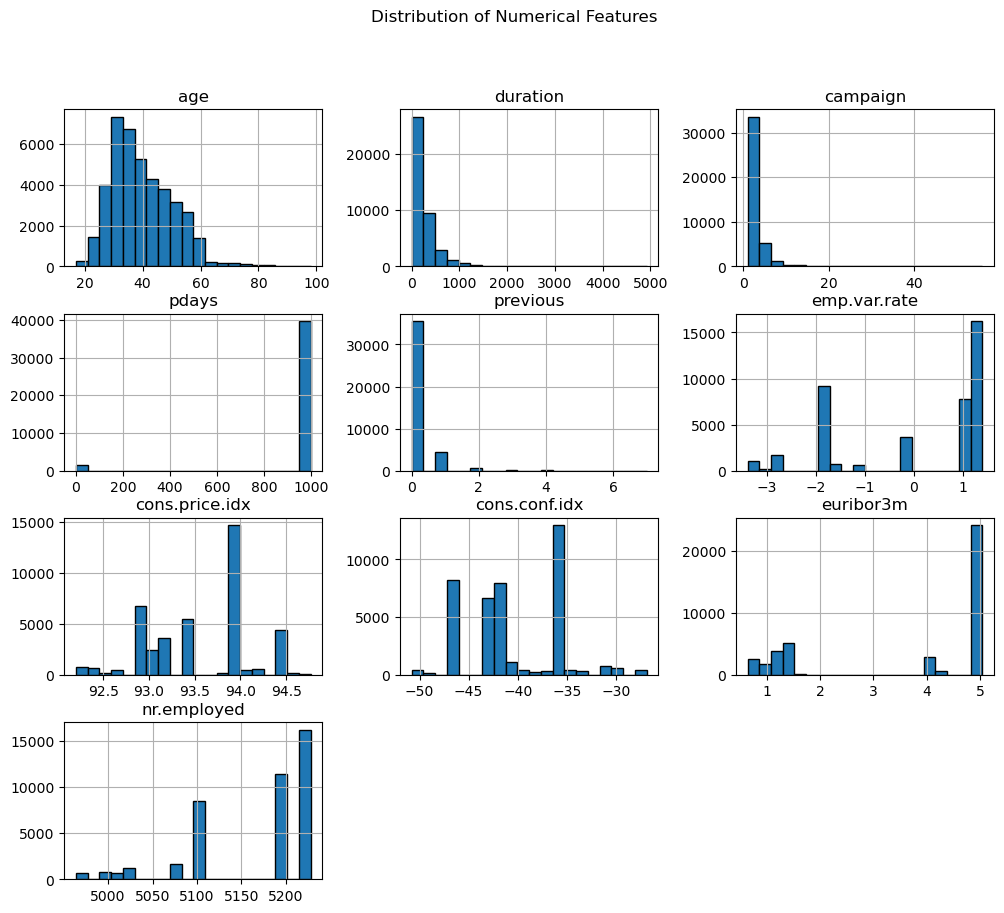

In [39]:
# Histograms for numerical features
numeric_features.hist(figsize=(12, 10), bins=20, edgecolor='black')
plt.suptitle('Distribution of Numerical Features')
plt.show()

### **2.3) Boxplots: Feature Relationship with Target**

Next, we’ll visualize how the selected numerical features relate to the subscription outcome (`y`).


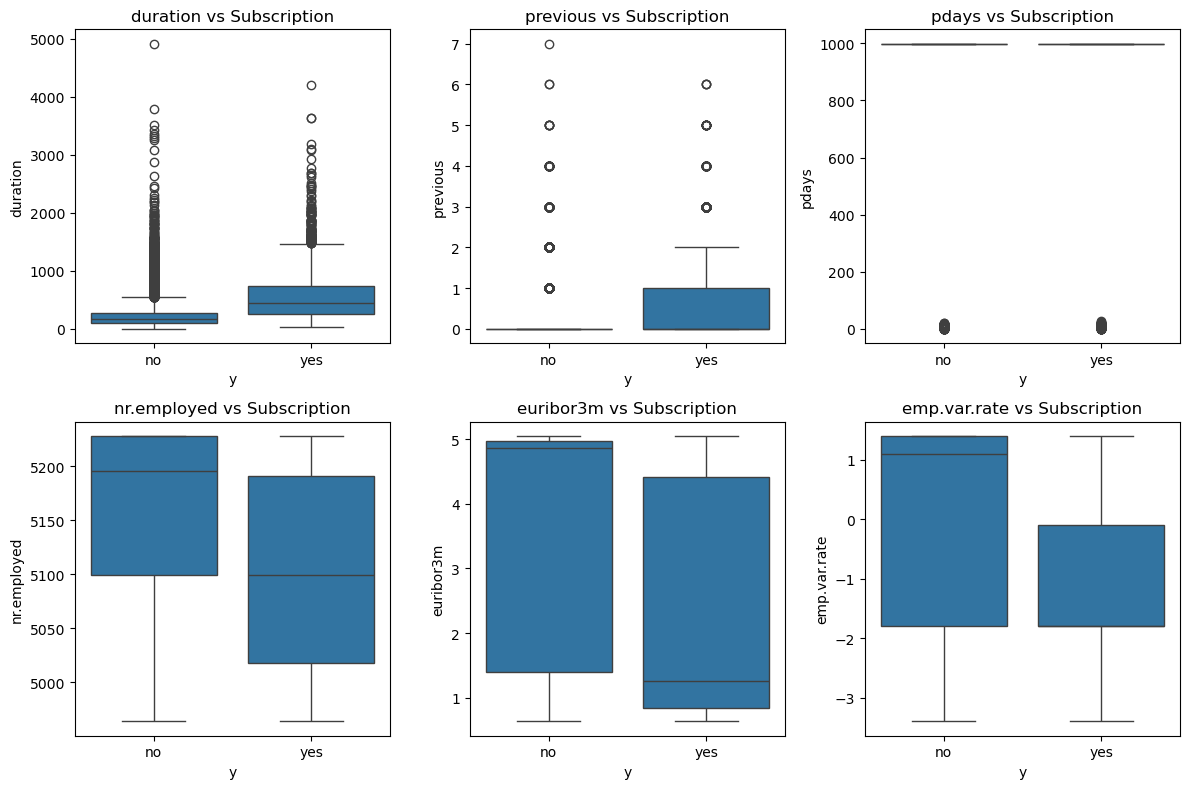

In [41]:
# Boxplots for numerical features vs target
plt.figure(figsize=(12,8))

for i, feature in enumerate(['duration', 'previous', 'pdays', 'nr.employed', 'euribor3m', 'emp.var.rate']):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(x='y', y=feature, data=data)
    plt.title(f'{feature} vs Subscription')
    plt.tight_layout()

plt.show()


### **2.4) Analyzing Categorical Features**

We’ll now explore the categorical variables to explore their relationship with subscription.

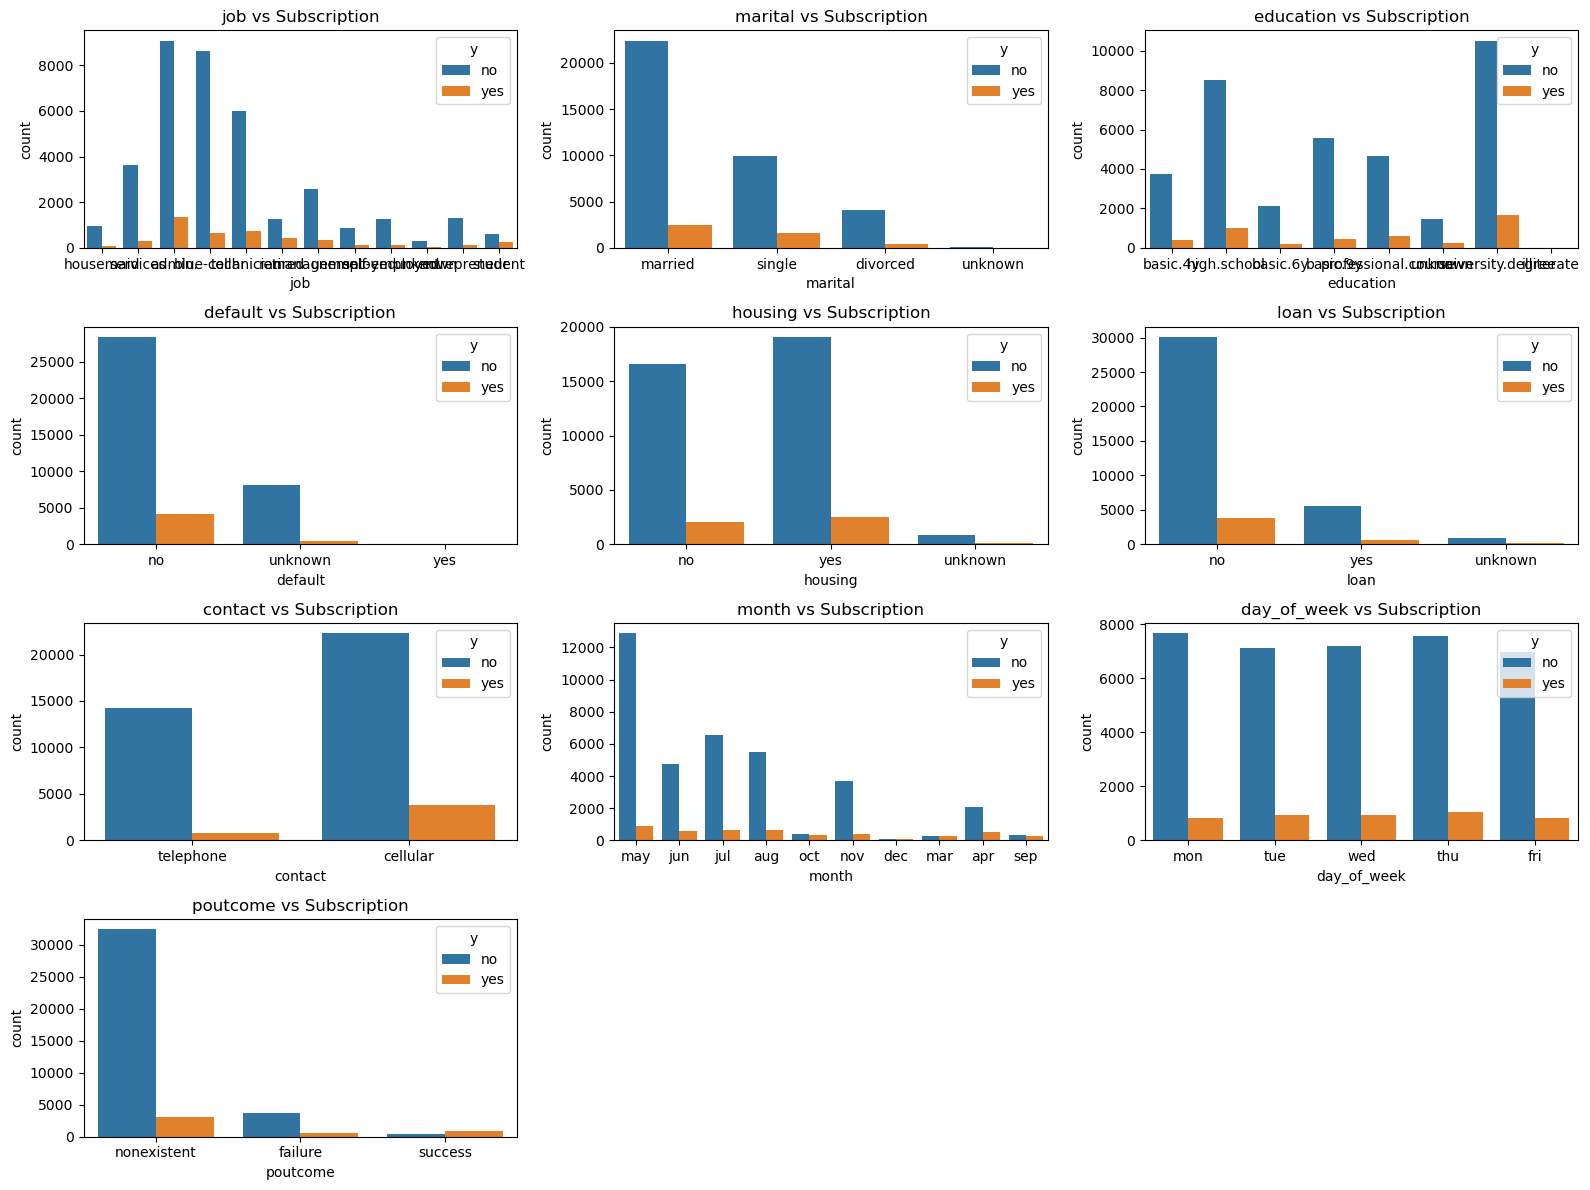

In [43]:
# Countplots for categorical variables vs target
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']

plt.figure(figsize=(16, 12))
for i, col in enumerate(categorical_columns):
    plt.subplot(4, 3, i + 1)
    sns.countplot(x=col, hue='y', data=data)
    plt.title(f'{col} vs Subscription')
    plt.tight_layout()

plt.show()


## **3) Feature Selection**
To prepare the data for prescriptive analysis, we will encode categorical variables into numerical format.

### **3.1) Encoding Categorical Variables**

In [46]:
# Apply label encoding and create a mapping for each categorical column
label_encoders = {}
encoding_mappings = {}

# Apply label encoding to the binary target variable
le = LabelEncoder()
data['y'] = le.fit_transform(data['y'])

# List of categorical columns
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']

# For each column, store the mapping of original to encoded values
for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le  # Store the encoder for future use
    
    # Store the mapping of original categories to their encoded values
    encoding_mappings[col] = dict(zip(le.classes_, le.transform(le.classes_)))

# Display the mappings
for col, mapping in encoding_mappings.items():
    print(f"Encoding for {col}: {mapping}")


Encoding for job: {'admin.': 0, 'blue-collar': 1, 'entrepreneur': 2, 'housemaid': 3, 'management': 4, 'retired': 5, 'self-employed': 6, 'services': 7, 'student': 8, 'technician': 9, 'unemployed': 10, 'unknown': 11}
Encoding for marital: {'divorced': 0, 'married': 1, 'single': 2, 'unknown': 3}
Encoding for education: {'basic.4y': 0, 'basic.6y': 1, 'basic.9y': 2, 'high.school': 3, 'illiterate': 4, 'professional.course': 5, 'university.degree': 6, 'unknown': 7}
Encoding for default: {'no': 0, 'unknown': 1, 'yes': 2}
Encoding for housing: {'no': 0, 'unknown': 1, 'yes': 2}
Encoding for loan: {'no': 0, 'unknown': 1, 'yes': 2}
Encoding for contact: {'cellular': 0, 'telephone': 1}
Encoding for month: {'apr': 0, 'aug': 1, 'dec': 2, 'jul': 3, 'jun': 4, 'mar': 5, 'may': 6, 'nov': 7, 'oct': 8, 'sep': 9}
Encoding for day_of_week: {'fri': 0, 'mon': 1, 'thu': 2, 'tue': 3, 'wed': 4}
Encoding for poutcome: {'failure': 0, 'nonexistent': 1, 'success': 2}


In [47]:
# Display the updated dataset
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,1,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,2,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,2,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0


### **3.2) Correlation Analysis and Feature Selection**

Let's identify the most relevant features for predicting term deposit subscription and reduce noise in the model. We'll start by checking how features correlate with each other and with the target variable (`y`). 


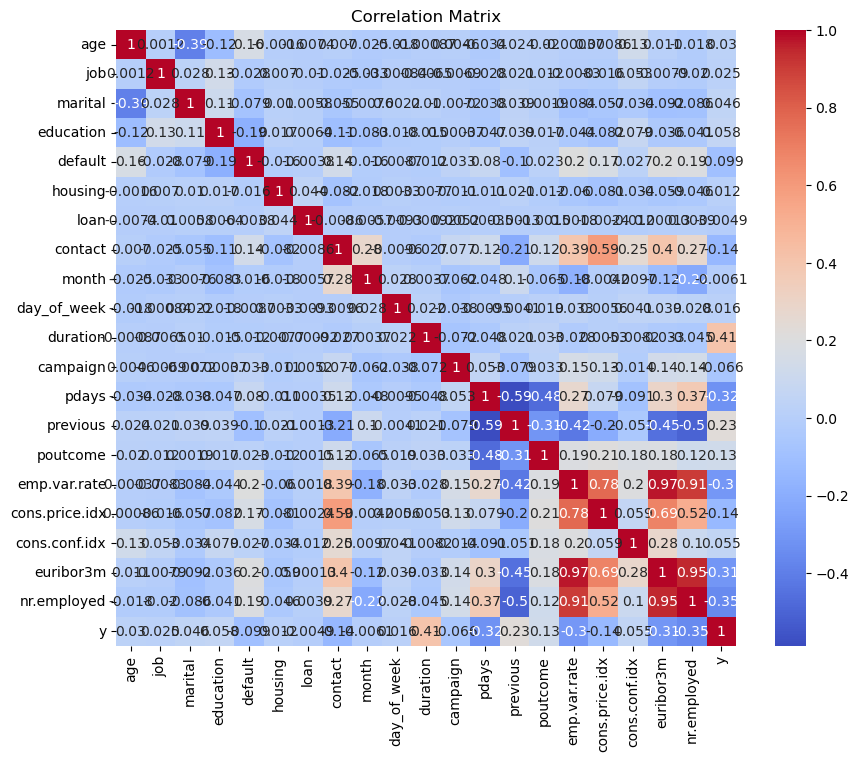

In [49]:
# Correlation heatmap for selected features
corr_matrix = data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [50]:
# Focusing on the correlation with the target variable ('y')
target_corr = corr_matrix['y'].sort_values(ascending=False)
print("Correlation with target (y):")
print(target_corr)


Correlation with target (y):
y                 1.000000
duration          0.405274
previous          0.230181
poutcome          0.129789
education         0.057799
cons.conf.idx     0.054878
marital           0.046203
age               0.030399
job               0.025122
day_of_week       0.015967
housing           0.011552
loan             -0.004909
month            -0.006065
campaign         -0.066357
default          -0.099352
cons.price.idx   -0.136211
contact          -0.144773
emp.var.rate     -0.298334
euribor3m        -0.307771
pdays            -0.324914
nr.employed      -0.354678
Name: y, dtype: float64


Our criteria on feature selection will be based on correlation values and statistical significance, as correlation may not mean causation

In [52]:
# List of categorical columns to test
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
p_values = []

# Perform Chi-Square test for each categorical column
for col in categorical_columns:
    contingency_table = pd.crosstab(data[col], data['y'])
    chi2, p_value, dof, expected = chi2_contingency(contingency_table)
    p_values.append(p_value)
    print(f"Chi-Square Test for {col}: uncorrected p-value = {p_value}")

# Apply Bonferroni correction
corrected_results_bonferroni = multipletests(p_values, method='bonferroni')
bonferroni_corrected_p_values = corrected_results_bonferroni[1]

# Display the results with Bonferroni correction
print("\nBonferroni-corrected p-values:\n")
for col, p_val in zip(categorical_columns, bonferroni_corrected_p_values):
    print(f"{col}: corrected p-value = {p_val}")
    if p_val < 0.05:
        print(f"{col} has a significant relationship with the target variable after Bonferroni correction.\n")
    else:
        print(f"{col} does NOT have a significant relationship with the target variable after Bonferroni correction.\n")

Chi-Square Test for job: uncorrected p-value = 4.189763287563623e-199
Chi-Square Test for marital: uncorrected p-value = 2.068014648442211e-26
Chi-Square Test for education: uncorrected p-value = 3.3051890144025054e-38
Chi-Square Test for default: uncorrected p-value = 5.1619579513916376e-89
Chi-Square Test for housing: uncorrected p-value = 0.05829447669453452
Chi-Square Test for loan: uncorrected p-value = 0.5786752870441754
Chi-Square Test for contact: uncorrected p-value = 1.5259856523129964e-189
Chi-Square Test for month: uncorrected p-value = 0.0
Chi-Square Test for day_of_week: uncorrected p-value = 2.9584820052785324e-05
Chi-Square Test for poutcome: uncorrected p-value = 0.0

Bonferroni-corrected p-values:

job: corrected p-value = 4.189763287563623e-198
job has a significant relationship with the target variable after Bonferroni correction.

marital: corrected p-value = 2.068014648442211e-25
marital has a significant relationship with the target variable after Bonferroni corr

In [53]:
# List of numerical columns to test
numerical_columns = ['duration', 'previous', 'pdays', 'nr.employed', 'euribor3m', 'emp.var.rate']
p_values_num = []

# Perform Mann-Whitney U Test for each numerical column
for col in numerical_columns:
    subscribed = data[data['y'] == 1][col]
    not_subscribed = data[data['y'] == 0][col]
    
    # Apply Mann-Whitney U Test
    u_stat, p_value = mannwhitneyu(subscribed, not_subscribed)
    p_values_num.append(p_value)
    print(f"Mann-Whitney U Test for {col}: uncorrected p-value = {p_value}")

# Apply Bonferroni correction
corrected_results_bonferroni_num = multipletests(p_values_num, method='bonferroni')
bonferroni_corrected_p_values_num = corrected_results_bonferroni_num[1]

# Display the results with Bonferroni correction
print("\nBonferroni-corrected p-values (Numerical):\n")
for col, p_val in zip(numerical_columns, bonferroni_corrected_p_values_num):
    print(f"{col}: corrected p-value = {p_val}")
    if p_val < 0.05:
        print(f"{col} has a significant relationship with the target variable after Bonferroni correction.\n")
    else:
        print(f"{col} does NOT have a significant relationship with the target variable after Bonferroni correction.\n")

Mann-Whitney U Test for duration: uncorrected p-value = 0.0
Mann-Whitney U Test for previous: uncorrected p-value = 0.0
Mann-Whitney U Test for pdays: uncorrected p-value = 0.0
Mann-Whitney U Test for nr.employed: uncorrected p-value = 0.0
Mann-Whitney U Test for euribor3m: uncorrected p-value = 0.0
Mann-Whitney U Test for emp.var.rate: uncorrected p-value = 0.0

Bonferroni-corrected p-values (Numerical):

duration: corrected p-value = 0.0
duration has a significant relationship with the target variable after Bonferroni correction.

previous: corrected p-value = 0.0
previous has a significant relationship with the target variable after Bonferroni correction.

pdays: corrected p-value = 0.0
pdays has a significant relationship with the target variable after Bonferroni correction.

nr.employed: corrected p-value = 0.0
nr.employed has a significant relationship with the target variable after Bonferroni correction.

euribor3m: corrected p-value = 0.0
euribor3m has a significant relationshi

In [54]:
# Most important features based on correlation values and significant relationship
selected_features = [
    'duration',
    'previous',
    'poutcome',
    'emp.var.rate',
    'euribor3m',
    'pdays',
    'nr.employed',
    'contact',
    'cons.price.idx'
]

## **4) Optimization Techniques**
We'll apply several optimization techniques to analyze which customer features and marketing strategies lead to better outcomes in the bank’s direct marketing campaigns.

### **4.1) Decision Trees / Rule-Based Prescriptions**
To begin with, let's build a **Decision Tree** model to classify customers based on the selected features and identify patterns leading to higher subscription rates. The decision tree will help us create actionable rules for different customer segments.

We’ll first train a decision tree classifier, select the best parameters and then visualize it in action:

In [57]:
# Define the target and selected features
X = data[selected_features]
y = data['y']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



In [58]:
# Define the parameter grid for tuning
param_grid = {
    'max_depth': [3, 4, 5, 6, 7, 8],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

# Initialize a DecisionTreeClassifier
dt_model = DecisionTreeClassifier(random_state=42)

# Initialize the grid search
grid_search = GridSearchCV(estimator=dt_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Perform the grid search on the training data
grid_search.fit(X_train, y_train)

# Get the best model from the grid search
best_dt_model = grid_search.best_estimator_

# Display the best parameters
print("Best parameters found by Grid Search:", grid_search.best_params_)

Best parameters found by Grid Search: {'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 4, 'min_samples_split': 2}


Final Decision Tree Accuracy (with selected features): 0.91

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.97      0.95     10968
           1       0.65      0.49      0.56      1389

    accuracy                           0.91     12357
   macro avg       0.79      0.73      0.75     12357
weighted avg       0.90      0.91      0.91     12357



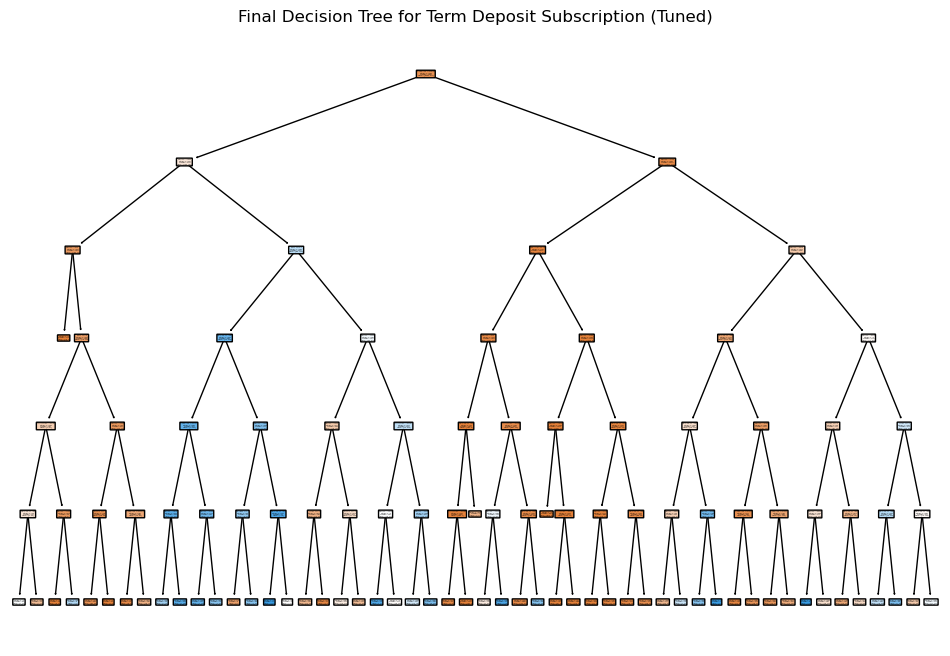

In [59]:
# Initialize the Decision Tree model with the best hyperparameters
final_dt_model = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=6,
    min_samples_leaf=4,
    min_samples_split=2,
    random_state=42
)

# Train the model on the selected features
final_dt_model.fit(X_train[selected_features], y_train)

# Make predictions on the test set
y_final_pred = final_dt_model.predict(X_test[selected_features])

# Evaluate the model's performance
final_accuracy = accuracy_score(y_test, y_final_pred)
print(f"Final Decision Tree Accuracy (with selected features): {final_accuracy:.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_final_pred))

# Plot the final decision tree
plt.figure(figsize=(12,8))
plot_tree(final_dt_model, feature_names=selected_features, class_names=['No', 'Yes'], filled=True, rounded=True)
plt.title('Final Decision Tree for Term Deposit Subscription (Tuned)')
plt.show()


After training the decision tree, we will analyze the rules derived from the tree and make prescriptive recommendations. This will provide insights into which customer characteristics lead to a higher likelihood of term deposit subscription.

### **4.2) Simulation & Sensitivity Analysis**
We will simulate different marketing scenarios by adjusting key features and observe how these changes affect subscription rates.

In [62]:
# Simulation function to modify selected features
def run_simulation(duration_multiplier=1, previous_multiplier=1, emp_var_rate_multiplier=1, pdays_multiplier=1, euribor3m_multiplier=1, nr_employed_multiplier=1, cons_price_idx_multiplier=1):
    simulated_data = data.copy()

    # Apply multipliers to relevant features
    simulated_data['duration'] = simulated_data['duration'] * duration_multiplier
    simulated_data['previous'] = simulated_data['previous'] * previous_multiplier
    simulated_data['emp.var.rate'] = simulated_data['emp.var.rate'] * emp_var_rate_multiplier
    simulated_data['pdays'] = simulated_data['pdays'] * pdays_multiplier
    simulated_data['euribor3m'] = simulated_data['euribor3m'] * euribor3m_multiplier
    simulated_data['nr.employed'] = simulated_data['nr.employed'] * nr_employed_multiplier
    simulated_data['cons.price.idx'] = simulated_data['cons.price.idx'] * cons_price_idx_multiplier

    # Return the modified dataset
    return simulated_data

# Define different simulation scenarios

# 1. Increase in Call Duration
simulation_duration = {
    "10% increase in duration": run_simulation(duration_multiplier=1.10),
    "20% increase in duration": run_simulation(duration_multiplier=1.20),
    "30% increase in duration": run_simulation(duration_multiplier=1.30),
    "10% decrease in duration": run_simulation(duration_multiplier=0.90),
}

# 2. More Frequent Follow-Ups
simulation_previous = {
    "50% increase in previous contacts": run_simulation(previous_multiplier=1.50),
    "30% increase in previous contacts": run_simulation(previous_multiplier=1.30),
    "20% decrease in previous contacts": run_simulation(previous_multiplier=0.80),
}

# 3. Economic Factors (emp.var.rate)
simulation_emp_var_rate = {
    "10% reduction in employment variation rate": run_simulation(emp_var_rate_multiplier=0.90),
    "20% reduction in employment variation rate": run_simulation(emp_var_rate_multiplier=0.80),
    "10% increase in employment variation rate": run_simulation(emp_var_rate_multiplier=1.10),
}

# 4. Quicker Follow-Ups (pdays)
simulation_pdays = {
    "20% reduction in pdays": run_simulation(pdays_multiplier=0.80),
    "30% reduction in pdays": run_simulation(pdays_multiplier=0.70),
    "10% increase in pdays": run_simulation(pdays_multiplier=1.10),
}

# 5. Changes in Economic Factors (euribor3m, nr.employed, cons.price.idx)
simulation_economic = {
    "10% increase in euribor3m": run_simulation(euribor3m_multiplier=1.10),
    "20% decrease in nr.employed": run_simulation(nr_employed_multiplier=0.80),
    "10% increase in consumer price index": run_simulation(cons_price_idx_multiplier=1.10),
    "10% decrease in consumer price index": run_simulation(cons_price_idx_multiplier=0.90),
}

# Combine all simulations into one dictionary
simulations = {
    **simulation_duration,
    **simulation_previous,
    **simulation_emp_var_rate,
    **simulation_pdays,
    **simulation_economic
}

# Function to evaluate subscription rate in each simulation
def evaluate_subscription_rate(simulated_data):
    # Predict with the best model trained on the original data
    X_simulated = simulated_data[selected_features]
    y_simulated = simulated_data['y']

    # Make predictions using the pre-trained best decision tree model
    y_pred_simulated = best_dt_model.predict(X_simulated)

    # Calculate and return the subscription rate
    subscription_rate = (y_pred_simulated == 1).mean() * 100
    return subscription_rate

# Run the simulations and gather results
simulation_results = {}
for scenario, simulated_data in simulations.items():
    subscription_rate = evaluate_subscription_rate(simulated_data)
    simulation_results[scenario] = subscription_rate

    
print("Current Subscription Rate: 11.27%\n")
# Display the results of the simulations
print("Sensitivity Analysis Results (Subscription Rate %):")
for scenario, rate in simulation_results.items():
    print(f"{scenario}: {rate:.2f}%")


Current Subscription Rate: 11.27%

Sensitivity Analysis Results (Subscription Rate %):
10% increase in duration: 9.80%
20% increase in duration: 11.05%
30% increase in duration: 12.42%
10% decrease in duration: 7.21%
50% increase in previous contacts: 8.54%
30% increase in previous contacts: 8.54%
20% decrease in previous contacts: 8.54%
10% reduction in employment variation rate: 8.54%
20% reduction in employment variation rate: 8.54%
10% increase in employment variation rate: 8.54%
20% reduction in pdays: 8.56%
30% reduction in pdays: 8.57%
10% increase in pdays: 8.50%
10% increase in euribor3m: 13.46%
20% decrease in nr.employed: 34.18%
10% increase in consumer price index: 9.64%
10% decrease in consumer price index: 10.72%


#### Conclusions from Sensitivity Analysis:

1. **Impact of Call Duration**:
   - A 10% increase in call duration leads to a slight drop in the subscription rate to 9.80%, but a 20% increase brings it back close to the current level at 11.05%. A 30% increase pushes the rate up to 12.42%.
   - Conversely, a 10% decrease in call duration has a significant negative effect, dropping the subscription rate to 7.21%.
   - **Conclusion**: Optimizing call duration by increasing it up to 30% can positively influence subscription rates. However, reducing call duration severely affects the results. <p></p>

2. **Effect of Previous Contacts**:
   - Surprisingly, increasing previous contact attempts by 50%, 30%, or even decreasing them by 20% shows no significant change in the subscription rate, remaining around 8.54%.
   - **Conclusion**: The number of previous contacts doesn't significantly impact the outcome, suggesting that increasing follow-up attempts beyond a certain point may not provide additional benefits. <p></p>

3. **Economic Conditions (Employment Variation Rate)**:
   - Changes in the employment variation rate, whether a 10% reduction or a 20% increase, do not seem to significantly alter the subscription rate, which hovers at 8.54%.
   - **Conclusion**: Economic fluctuations in the employment variation rate don't show a clear link with subscription rates, making this factor less critical for strategy optimization. <p></p>

4. **Pdays (Days Since Last Contact)**:
   - A 20% or 30% reduction in pdays slightly improves the subscription rate (8.56% and 8.57%, respectively), while a 10% increase slightly reduces it to 8.50%.
   - **Conclusion**: Shortening the gap between contacts offers a marginal improvement in subscription rates, though the overall impact remains minor. <p></p>

5. **Euribor3m (3-Month Euro Interbank Offered Rate)**:
   - A 10% increase in euribor3m shows a significant rise in the subscription rate, jumping to 13.46%.
   - **Conclusion**: A higher euribor3m seems to correlate strongly with improved subscription rates, likely reflecting better market conditions. This feature should be carefully monitored as it has substantial predictive power. <p></p>

6. **Number of Employees (nr.employed)**:
   - A 20% reduction in the number of employees dramatically increases the subscription rate to 34.18%.
   - **Conclusion**: This strong positive correlation might suggest that certain economic conditions (perhaps reflecting labor market tightening) are highly favorable for term deposit subscriptions. <p></p>

7. **Consumer Price Index (cons.price.idx)**:
   - A 10% increase in the consumer price index lowers the subscription rate to 9.64%, while a 10% decrease slightly improves it to 10.72%.
   - **Conclusion**: While changes in the consumer price index affect the subscription rate, the impact is moderate compared to other factors. A lower index (indicating better economic conditions) tends to improve outcomes. <p></p>

---

#### General Observations:
- **Most Influential Features**: Call duration, euribor3m, and the number of employees show the strongest influence on subscription rates. Optimizing these variables could significantly improve campaign success.
- **Marginal Impact**: Variables like previous contacts, pdays, and employment variation rate have less impact and should not be prioritized in campaign adjustments.


### **4.3) Cost-Benefit Analysis**

To conduct a comprehensive **Cost-Benefit Analysis** for the marketing campaign, we'll follow these steps: 

#### 4.3.1) **Define Costs**:
   - **Cost per Call**: The cost of contacting a customer. This could include the wages for call center employees, equipment, and software costs. 
     - Example: Assume the cost per call is \$5.
   - **Cost of Increased Campaign Duration**: If longer calls improve subscription rates, but each additional minute has an associated cost. 
     - Example: An increase of 10% in call duration might add \$0.50 per call.
   - **Cost of Follow-Up Calls**: Increased follow-up calls could require more resources (e.g., additional call attempts).
     - Example: Each follow-up call may have an added cost of \$2.

#### 4.3.2) **Estimate Revenue**:
   - **Revenue per Subscription**: This is the average revenue generated by a customer subscribing to the term deposit.
     - Example: Assume the average revenue per subscription is \$100.
   - **Subscription Rate**: The percentage of contacted customers who subscribe, based on the sensitivity analysis results.
     - Example: Varies between scenarios (e.g., 9.80%, 11.05%, etc.). 

#### 4.3.3) **Calculate Benefit**:
   - **Benefit per Contact**: Revenue earned for each contact (subscription rate * revenue per subscription).
     - Example: If the subscription rate is 11.05% and the revenue per subscription is \$100, the benefit per contact is:
     ```
     Benefit = 11.05% * $100 = $11.05 per contact
     ```

#### 4.3.4) **Net Benefit**:
   - **Net Benefit per Call**: The difference between the benefit per contact and the cost of contacting the customer.
     - Example: If the cost per call is \$5 and the benefit per contact is $11.05, then:
     ```
     Net Benefit = $11.05 - $5 = $6.05 per call
     ```

#### 4.3.5) **Cost-Benefit Scenarios Based on Simulations**:

| Scenario                               | Subscription Rate | Cost per Call (\$) | Benefit per Contact (\$) | Net Benefit per Call (\$) |
|----------------------------------------|-------------------|-------------------|-------------------------|--------------------------|
| Current Subscription Rate    | 11.27%            | 5                 | 11.27                    | 6.27                     |
| 10% increase in duration               | 9.80%             | 5.50              | 9.80                     | 4.30                     |
| 20% increase in duration               | 11.05%            | 6                 | 11.05                    | 5.05                     |
| 30% increase in duration               | 12.42%            | 6.50              | 12.42                    | 5.92                     |
| 10% decrease in duration               | 7.21%             | 4.50              | 7.21                     | 2.71                     |
| 50% increase in previous contacts      | 8.54%             | 7                 | 8.54                     | 1.54                     |
| 10% reduction in employment var. rate  | 8.54%             | 5                 | 8.54                     | 3.54                     |
| 10% increase in euribor3m              | 13.46%            | 5                 | 13.46                    | 8.46                     |
| 20% reduction in nr.employed           | 34.18%            | 5                 | 34.18                    | 29.18                    |
| 10% increase in consumer price index   | 9.64%             | 5                 | 9.64                     | 4.64                     |

#### 4.3.6) **Key Insights from the Cost-Benefit Analysis**:
- **Call Duration Adjustments**: Increasing call duration improves the subscription rate, but the net benefit per call decreases as the additional cost rises. A 30% increase in duration results in a higher net benefit than smaller increases.
- **Follow-Up Calls**: Increasing the number of follow-up calls does not significantly improve the subscription rate, and with additional call costs, the net benefit drops substantially.
- **Euribor3m Sensitivity**: A 10% increase in euribor3m has a positive impact, resulting in a higher subscription rate and a substantial increase in the net benefit per call.
- **Employment Variation Rate and Consumer Price Index**: Both features show moderate effects on subscription rates, but the net benefit remains positive, making them reasonable options for further focus. 

#### 4.3.7). **Conclusion**:
- The best approach for maximizing net benefit per call is optimizing call duration and focusing on external economic factors (euribor3m and nr.employed).
- Avoid over-relying on follow-up contacts, as they incur additional costs without significantly increasing subscription rates.


## 5) Recommendations

Based on the Cost-Benefit and Sensitivity Analyses, the following actionable recommendations are made to optimize the bank's direct marketing campaign:

#### 1. **Optimize Call Duration**:
   - **Recommendation**: Aim for a 20-30% increase in call duration, as this range provides the best balance between increasing the subscription rate and maintaining a positive net benefit per call.
   - **Rationale**: A 30% increase in duration results in a net benefit of \$5.92 per call, which is higher than smaller increases or decreases in duration.

#### 2. **Minimize Excessive Follow-Up Calls**:
   - **Recommendation**: Limit follow-up contacts, as increasing previous contact attempts by 50% does not significantly improve subscription rates and results in a reduced net benefit.
   - **Rationale**: The sensitivity analysis showed little change in subscription rate (8.54%) with additional contacts, and the cost of follow-up calls leads to diminishing returns.

#### 3. **Leverage Economic Factors**:
   - **Recommendation**: Focus on customers when external economic indicators like **euribor3m** and **employment variation rate** are favorable. For instance, a 10% increase in euribor3m improves subscription rates to 13.46%, providing a significant uplift in the campaign's success.
   - **Rationale**: Economic conditions directly influence customers' financial decisions, and targeting campaigns during favorable periods can enhance subscription outcomes.

#### 4. **Target Customer Segments Based on Employment**:
   - **Recommendation**: Prioritize customer segments with a high correlation to employment rates. A 20% reduction in the number of employed customers resulted in the highest subscription rate of 34.18%, indicating that employment levels strongly influence customer behavior.
   - **Rationale**: Employment status is a critical factor in determining customers' likelihood of subscribing, making it an important criterion for campaign targeting. This could be because people become more cautious and prefer to save during uncertain economic times.

#### 5. **Adjust Campaigns According to Consumer Price Index (CPI)**:
   - **Recommendation**: During periods of favorable CPI, increase marketing efforts, as this positively influences subscription rates. A 10% increase in CPI leads to a 9.64% subscription rate, indicating its effect on customer behavior.
   - **Rationale**: Inflation and changes in the consumer price index impact customers' ability to invest, making CPI an important external factor to monitor.

#### 6. **Continued Monitoring and Adaptation**:
   - **Recommendation**: Regularly monitor and adapt the campaign strategy based on real-time economic data and customer behavior to ensure optimal results.
   - **Rationale**: The dynamic nature of economic factors means continuous adjustments will be required to maximize the campaign's cost-efficiency and success rates.

By implementing these data-driven recommendations, the bank can optimize its marketing efforts, improve subscription rates, and maximize the net benefit per call.